# Processing data

In [1]:
import json
import csv
import ast
import pandas as pd 
import re
import datetime
import time
import numpy as np
import nltk
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.sentiment import SentimentIntensityAnalyzer

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#read excel
df = pd.read_csv (r'/Users/sonia/Desktop/FYP_resources/data_scraping/Overall Mobility Transport Demand Survey(1-369).csv')
#read_file.to_csv (r'/Users/sonia/Desktop/FYP_resources/data scraping and cleaning/Overall Mobility Transport Demand Survey(1-369).csv', index = None, header=True)

In [3]:
df.tail(20)

,ID,Start time,Completion time,Email,Name,What is your age?,What is your gender?,What is your current employment status?,What is your monthly income range?,Are you a tertiary student?,...,Customer Service,Cost,Comfort,Reliability,Service Information,Overall Rating,What are your opinions on ComfortDelGro?,How do you think ComfortDelGro can improve their services?,Which of the following options would incentivize you to use ComfortDelGro's Rent-A-Car service?,"If you wish to participate in the lucky draw, please fill in your email address below."
349,368,9/7/21 15:07:23,9/7/21 15:17:06,anonymous,NaN,22 - 25,Male,Full-time Student;,"$501 - $1,000",Yes,...,Somewhat satisfied,Somewhat satisfied,Somewhat satisfied,Somewhat satisfied,Somewhat satisfied,Somewhat satisfied,NaN,NaN,Promotion codes;,austin.lim.2018@economics.smu.edu.sg
350,369,9/7/21 15:10:26,9/7/21 15:17:54,anonymous,NaN,22 - 25,Female,Full-time Student;,Prefer not to say,Yes,...,Somewhat satisfied,Somewhat satisfied,Somewhat satisfied,Somewhat satisfied,Somewhat satisfied,Somewhat satisfied,Neutral,Promotions,Competitive prices;Promotion codes;,jh97neo@gmail.com
351,370,9/7/21 17:53:58,9/7/21 18:02:35,anonymous,NaN,18 - 21,Female,Full-time Student;,Prefer not to say,Yes,...,Somewhat satisfied,Somewhat satisfied,Somewhat satisfied,Somewhat satisfied,Very satisfied,Somewhat satisfied,NaN,NaN,NaN,E210125@e.ntu.edu.sg
352,371,9/7/21 19:34:50,9/7/21 19:56:44,anonymous,NaN,18 - 21,Female,Full-time Student;,Below $500,Yes,...,Neutral,Somewhat satisfied,Neutral,Somewhat satisfied,Somewhat dissatisfied,Neutral,It is a very old company that would need rebra...,The drivers can don't go too fast when driving...,Competitive prices;Promotion codes;,sim.lexuan36@gmail.com
353,303,9/2/21 16:31:49,9/2/21 16:32:54,anonymous,NaN,26 - 29,Female,Employed Full-time;,">$3,001",No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
354,308,9/2/21 19:34:49,9/2/21 19:35:14,anonymous,NaN,22 - 25,Male,Full-time Student;,Prefer not to say,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
355,309,9/2/21 19:36:53,9/2/21 19:37:05,anonymous,NaN,22 - 25,Male,Employed Full-time;,"$2,001 - $3,000",No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356,314,9/2/21 21:32:30,9/2/21 23:22:14,anonymous,NaN,22 - 25,Female,Unemployed;,Prefer not to say,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
357,316,9/3/21 10:35:37,9/3/21 10:35:54,anonymous,NaN,26 - 29,Female,Employed Full-time;,">$3,001",No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
358,317,9/3/21 10:35:56,9/3/21 10:36:12,anonymous,NaN,>29,Male,Employed Full-time;,">$3,001",No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
def remove_space(df, colname):
    # Remove whitespace in header
    df.rename(columns=lambda x: x.strip(), inplace=True)
    # Remove whiteshpace in body
    df[colname] = df[colname].str.strip(" ")
    df[colname] = df[colname].replace(r'\\n', ' ', regex = True)
    df[colname] = df[colname].replace('\s+', ' ', regex = True)
    df[colname] = df[colname].dropna()

In [10]:
def lower_case(df, colname):
    df[colname] = df[colname].str.lower()

In [11]:
def special_character(df, colname):
    df[colname].replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)

In [15]:
#clean df
df['How do you think ComfortDelGro can improve their services?'] = data['How do you think ComfortDelGro can improve their services?'].str.strip()
remove_space(data, 'How do you think ComfortDelGro can improve their services?')
lower_case(data, 'How do you think ComfortDelGro can improve their services?')
special_character(data, 'How do you think ComfortDelGro can improve their services?')

TypeError: string indices must be integers

In [16]:
# Remove punctuation
df['How do you think ComfortDelGro can improve their services?'] = df['How do you think ComfortDelGro can improve their services?'].astype(str).map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
df['How do you think ComfortDelGro can improve their services?'] = df['How do you think ComfortDelGro can improve their services?'].map(lambda x: x.lower())

# Remove emojis
df['How do you think ComfortDelGro can improve their services?'] = df['How do you think ComfortDelGro can improve their services?'].apply(lambda x: x.encode('ascii', 'ignore').decode('ascii'))

In [17]:
df['How do you think ComfortDelGro can improve their services?']

0                   not very sure dont take them often
1                                                  nan
2      lowering their price to compete with grab/gojek
3                                                  nan
4                                                  nan
                            ...                       
364                                                nan
365                                                nan
366                                                nan
367                                                nan
368                                                nan
Name: How do you think ComfortDelGro can improve their services?, Length: 369, dtype: object

# WordCloud

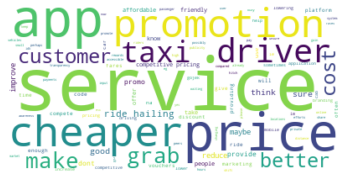

In [23]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["nan","nil"])

# Start with one review:
# text = df_sentiment_neg.Reviews_processed
# text = " ".join(review for review in df_sentiment_pos.Reviews_processed)

df_message = df['How do you think ComfortDelGro can improve their services?'].values
df_text = " ".join(list(df_message))

# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(df_text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [4]:

# Remove punctuation
df['On what occasion would you charter a bus?'] = df['On what occasion would you charter a bus?'].astype(str).map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
df['On what occasion would you charter a bus?'] = df['On what occasion would you charter a bus?'].map(lambda x: x.lower())
df['On what occasion would you charter a bus?']

0                                                    nan
1      going on a trip to somewhere with many people ...
2                                                    nan
3                                                    nan
4                                                    nan
                             ...                        
364                                                  nan
365                                                  nan
366                                                  nan
367                                                  nan
368                                                  nan
Name: On what occasion would you charter a bus?, Length: 369, dtype: object

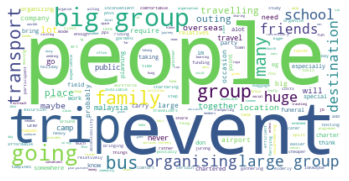

In [5]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["nan","nil"])

# Start with one review:
# text = df_sentiment_neg.Reviews_processed
# text = " ".join(review for review in df_sentiment_pos.Reviews_processed)

df_message1 = df['On what occasion would you charter a bus?'].values
df_text1 = " ".join(list(df_message1))

# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(df_text1)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [8]:
# Remove punctuation
df['Why do you prefer these ride-hailing services?'] = df['Why do you prefer these ride-hailing services?'].astype(str).map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
df['Why do you prefer these ride-hailing services?'] = df['Why do you prefer these ride-hailing services?'].map(lambda x: x.lower())
df['Why do you prefer these ride-hailing services?']

0      familiar with the software easy user interface
1            more affordable and competitive pricing 
2                       because of ongoing promotions
3                                                 nan
4                                                 nan
                            ...                      
364                                               nan
365                                               nan
366                                               nan
367                                               nan
368                                               nan
Name: Why do you prefer these ride-hailing services?, Length: 369, dtype: object

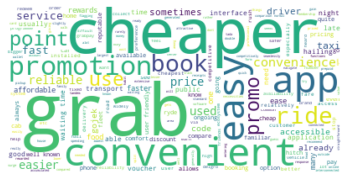

In [10]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["nan","nil"])

# Start with one review:
# text = df_sentiment_neg.Reviews_processed
# text = " ".join(review for review in df_sentiment_pos.Reviews_processed)

df_message2 = df['Why do you prefer these ride-hailing services?'].values
df_text2 = " ".join(list(df_message2))

# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(df_text2)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [11]:
# Remove punctuation
df['If Yes, please briefly describe the problem.'] = df['If Yes, please briefly describe the problem.'].astype(str).map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
df['If Yes, please briefly describe the problem.'] = df['If Yes, please briefly describe the problem.'].map(lambda x: x.lower())
df['If Yes, please briefly describe the problem.']

0      nan
1      nan
2      nan
3      nan
4      nan
      ... 
364    nan
365    nan
366    nan
367    nan
368    nan
Name: If Yes, please briefly describe the problem., Length: 369, dtype: object

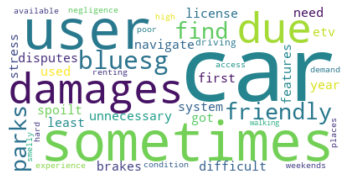

In [12]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["nan","nil"])

# Start with one review:
# text = df_sentiment_neg.Reviews_processed
# text = " ".join(review for review in df_sentiment_pos.Reviews_processed)

df_message3 = df['If Yes, please briefly describe the problem.'].values
df_text3 = " ".join(list(df_message3))

# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(df_text3)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()